In [ ]:
import numpy as np 
import matplotlib.pyplot as plt
import random as rd

In [ ]:
# fonction du calcul du coût 
def fonction_cout():
  global chemin 
  energie =0.0 
  xy = np.column_stack((x[chemin],y[chemin]))
  energie = np.sum(np.sqrt(np.sum((xy-np.roll(xy,-1,axis=0))**2, axis=1)))
  return energie

In [ ]:
#Fonction de déplacement dans le chemin 
def Deplacement(ville1, ville2):
  global chemin 
  Min = min(ville1, ville2)
  Max = max(ville1, ville2)
  chemin[Min:Max] = chemin[Min:Max].copy()[::-1]
  return 

k = 0 chemin hamiltonien : [0 1 2 3 4] distance du chemin = 2.1312444732727527 température 10
k = 1 Chemin Hamiltonien : [0 1 3 2 4] Distance du chemin =  2.1260243475882876 Température 9.900498337491682
k = 2 Chemin Hamiltonien : [2 3 1 0 4] Distance du chemin =  2.1260243475882876 Température 9.801986733067553
k = 3 Chemin Hamiltonien : [2 3 1 0 4] Distance du chemin =  2.1260243475882876 Température 9.70445533548508
k = 4 Chemin Hamiltonien : [0 1 3 2 4] Distance du chemin =  2.1260243475882876 Température 9.607894391523232
k = 5 Chemin Hamiltonien : [0 1 2 3 4] Distance du chemin =  2.1312444732727527 Température 9.51229424500714
k = 6 Chemin Hamiltonien : [0 1 2 3 4] Distance du chemin =  2.1312444732727527 Température 9.417645335842487
k = 7 Chemin Hamiltonien : [0 1 2 3 4] Distance du chemin =  2.1312444732727527 Température 9.323938199059484
k = 8 Chemin Hamiltonien : [3 2 1 0 4] Distance du chemin =  2.1312444732727527 Température 9.231163463866357
k = 9 Chemin Hamiltonien : [

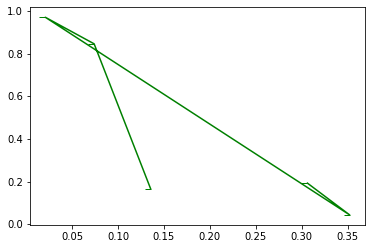

In [ ]:
N= 5 # Nombre de ville 
T0= 10 # Température initiale 
T= T0 # Température 
Tmin= 9 # Température minimum 
tau= 1e2 # 
beta= 1e-1
k= 0
t= 0

#choix des coordonnées des points villes 
x= np.random.uniform(0,1,N)
y= np.random.uniform(0,1,N)

#choix du chemin initiale 
chemin = np.arange(N)
chemin1 = chemin.copy()

#calcul de la distance du chemin initiale 
cout_courant = fonction_cout()
d1= cout_courant
print ('k =', k, 'chemin hamiltonien :', chemin,'distance du chemin =', cout_courant, 'température', T )

while T> Tmin:
  ville_voisine = rd.randint(0,N-1)
  ville_courante = rd.randint(0,N-1)
  if ville_voisine == ville_courante: continue 

  # Déplacement 
  Deplacement(ville_voisine, ville_courante)

  #calcul de la distance du nouveau 
  cout_nouveau = fonction_cout()

  if cout_nouveau <= cout_courant:
    cout_courant = cout_nouveau
  else : #Critère de Métropolis 
    dE = cout_nouveau - cout_courant
    #beta=rd.uniform(0,1)
    if beta > np.exp(-dE/T):
      Deplacement(ville_voisine, ville_courante)#la nouvelle solution (le nouveau chemin) est rejetée.
    else:
      cout_courant = cout_nouveau # On accepte la nouvelle solution (chemin) malgré qu'elle n'améliore pas la fonction avec la probabilité du critère de Métropolis 
      #Abaisser la température ---> refroidissement 
  
  t+=1
  T = T0 *np.exp(-t/tau)
  k+=1
  print('k =', k, 'Chemin Hamiltonien :', chemin, 'Distance du chemin = ', cout_courant, 'Température', T)
  
  #Affichage des résultats finaux 

print('   résultat final ')
print('Chemin Hamiltonien Initial :', chemin1, 'Distance du chemin Initial =', d1, 'Température Initiale =', T0)
print('Chemin Hamiltonien Optimal :', chemin, 'Distance du chemin Optimal =', cout_courant, 'Température Finale =', T)
plt.plot(x[chemin1], y[chemin1], marker =0, color='g')




In [ ]:
def ratio_b_over_v(xi):
    return xi[2]/xi[1]

In [ ]:
def total_valu_size(packing, valus, sizes, max_size):
  # total value and size of a specified packing

  v = 0.0  # total valu of packing
  s = 0.0  # total size of packing
  n = len(packing)

  for i in range(n):
    if packing[i] == 1:
      v += valus[i]
      s += sizes[i]

  if s > max_size:  # too big to fit in knapsack
    v = 0.0
  return (v, s)

def adjacent(packing, rnd):
  n = len(packing)
  result = np.copy(packing)
  i = rnd.randint(n)
  if result[i] == 0:
    result[i] = 1
  elif result[i] == 1:
    result[i] = 0
  return result

def solve(n_items, rnd, valus, sizes, max_size, max_iter, start_temperature, alpha):
  # solve using simulated annealing

  curr_temperature = start_temperature
  curr_packing = np.ones(n_items, dtype=np.int64)

  print("Initial guess: ")
  print(curr_packing)

  (curr_valu, curr_size) = total_valu_size(curr_packing, valus, sizes, max_size)

  iteration = 0
  interval = (int)(max_iter / 10)
  while iteration < max_iter:
    # pct_iters_left = (max_iter - iteration) / (max_iter * 1.0)
    adj_packing = adjacent(curr_packing, rnd)
    (adj_v, _) = total_valu_size(adj_packing, valus, sizes, max_size)

    if adj_v > curr_valu:  # better so accept adjacent
      curr_packing = adj_packing; curr_valu = adj_v
    else:          # adjacent packing is worse
      accept_p = np.exp( (adj_v - curr_valu ) / curr_temperature ) 
      p = rnd.random()
      if p < accept_p:  # accept worse packing anyway
        curr_packing = adj_packing; curr_valu = adj_v 
      # else don't accept

    if iteration % interval == 0:
      print("iter = %6d : curr value = %7.0f : curr temp = %10.2f " % (iteration, curr_valu, curr_temperature))

    if curr_temperature < 0.00001:
      curr_temperature = 0.00001
    else:
      curr_temperature *= alpha

    iteration += 1

  return curr_packing       

def main():

  valus = np.array([79, 32, 47, 18, 26, 85, 33, 40, 45, 59])
  sizes = np.array([85, 26, 48, 21, 22, 95, 43, 45, 55, 52])
  max_size = 101

  print("\nItem values: ")
  print(valus)
  print("\nItem sizes: ")
  print(sizes)
  print("\nMax total size = %d " % max_size)

  rnd = np.random.RandomState(5)  # 3 .98 = 117,100
  max_iter = 1000
  start_temperature = 10000.0
  alpha = 0.98

  print("\nSettings: ")
  print("max_iter = %d " % max_iter)
  print("start_temperature = %0.1f " % start_temperature)
  print("alpha = %0.2f " % alpha)

  print("\nStarting solve() ")
  packing = solve(10, rnd, valus, sizes, 
    max_size, max_iter, start_temperature, alpha)
  print("Finished solve() ")

  print("\nBest packing found: ")
  print(packing)
  (v,s) = \
    total_valu_size(packing, valus, sizes, max_size)
  print("\nTotal value of packing = %0.1f " % v)
  print("Total size  of packing = %0.1f " % s)

  print("\nEnd demo ")

if __name__ == "__main__":
  main()


Item values: 
[79 32 47 18 26 85 33 40 45 59]

Item sizes: 
[85 26 48 21 22 95 43 45 55 52]

Max total size = 101 

Settings: 
max_iter = 1000 
start_temperature = 10000.0 
alpha = 0.98 

Starting solve() 
Initial guess: 
[1 1 1 1 1 1 1 1 1 1]
iter =      0 : curr value =       0 : curr temp =   10000.00 
iter =    100 : curr value =       0 : curr temp =    1326.20 
iter =    200 : curr value =       0 : curr temp =     175.88 
iter =    300 : curr value =       0 : curr temp =      23.33 
iter =    400 : curr value =      98 : curr temp =       3.09 
iter =    500 : curr value =      98 : curr temp =       0.41 
iter =    600 : curr value =      98 : curr temp =       0.05 
iter =    700 : curr value =      98 : curr temp =       0.01 
iter =    800 : curr value =      98 : curr temp =       0.00 
iter =    900 : curr value =      98 : curr temp =       0.00 
Finished solve() 

Best packing found: 
[0 1 0 0 1 0 0 1 0 0]

Total value of packing = 98.0 
Total size  of packing = 93.0 


In [ ]:
def get_voisin(solution, pt, vMax, vMin):
  taille = len(solution)
  nb = np.random.randint(1,taille)
  #print("nb = ",nb)
  for i in range(0, nb, +1):
    x = np.random.randint(taille-1)
    #print("supprimer l'élement x =", x)
    del solution[x]
  #print("après suppression")
  #print( solution)
  taille = len(solution)
  volume = get_v(solution)

  #print("maintenant l ajout d'élément")
  while vMax - volume > vMin :
    x = np.random.randint(len(pt)-1) 
    #print("l élément à ajouter x =", x)
    #print(str(vMax - volume)+">" +str(pt[x][1]))
    if (vMax - volume > pt[x][1]):
      num_produit = pt[x][0]
      solution.append(num_produit)
      volume += pt[i][1]
  return solution


In [ ]:
def get_v(solution):
  volume = 0
  for i in range(len(solution)):
    volume += pt[solution[i]-1][1]
  return volume

In [ ]:
def get_b(solution):
  benefice = 0
  for i in range(len(solution)):
    benefice += pt[solution[i]-1][2]
  return benefice

In [ ]:
def affichage(solution, nb_element):
  affichage = np.zeros(nb_element, dtype=np.int64)
  for i in range (0, len(solution), +1):
    affichage[solution[i]-1] += 1
  return affichage


In [ ]:
def Recuit_simule(max_iter, solution_initiale, temperature_initial, alpha, rnd):
  print("*************paramètres*************")
  print("nombre d'itérations : ", max_iter)
  print("température initiale : ", temperature_initial)
  print("alpha : ", alpha)
  # initialisation de solution courrante
  (solution_courrante, volume_courrant, benefice_courant) = (solution_initiale, get_v(solution_initiale), get_b(solution_initiale))
  (meilleure_solution, meilleure_benefice) = (solution_courrante, get_b(solution_courrante))
  print("\n*********solution initial***********")
  print(meilleure_solution)
  print("cout initiale : ",meilleure_benefice)
  print("************************************\n")

  temperature_courrante = temperature_initial
  iteration = 0
  interval = (int)(max_iter / 10)
  while iteration < max_iter:
      solution_voisin = get_voisin(solution_courrante, pt, vMax, vMin ) # générer une solution voisine en utilisant la fonction aléatoire 
      (volume_voisin, benefice_voisin) = (get_v(solution_voisin),get_b(solution_voisin))

      if benefice_voisin > benefice_courant:  # si le cout du voisin est suppérieure 
        (solution_courrante, volume_courrant, benefice_courrant) = (solution_voisin, volume_voisin, benefice_voisin)

        if (meilleure_benefice < benefice_courrant):
          (meilleure_solution, meilleure_benefice) = (solution_courrante, benefice_courrant)

      else:          # si le cout du voisin est inférieure
        accept_p = np.exp( (volume_voisin - volume_courrant ) / temperature_courrante ) 
        p = rnd.random()
        if p < accept_p: 
          (solution_courrante, volume_courrant, benefice_courrant) = (solution_voisin, volume_voisin, benefice_voisin)
        # else don't accept

      if iteration % interval == 0:
        print("iter = %6d  benefice = %7.0f volume = %7.0f temperature = %10.2f  solution courrante = " % (iteration, benefice_courrant, volume_courrant,  temperature_courrante), affichage(solution_courrante, len(pt)))

      if temperature_courrante < 0.00001:
        temperature_courrante = 0.00001
      else:
        temperature_courrante*= alpha

      iteration += 1
  
  print("\n*********meilleure_solution***********")
  print(meilleure_solution)
  print("meilleure cout : ",meilleure_benefice)
  return meilleure_solution, meilleure_benefice

In [ ]:
# volume du sac
vMax = 130

# produits
x1 = [1,33,4]
x2 = [2,49,5]
x3 = [3,60,6]
x4 = [4,32,2]

# table des produits
pt = [x1,x2,x3,x4]
pt.sort(key=ratio_b_over_v, reverse=True)

#génération de la solution initiale
solution_initiale = [] 
vAc = 0 #volume actuel
vMin = 32
vRes = vMax - vAc
i = 0
while (vRes > vMin and i < len(pt)):
  if pt[i][1] < (vMax - vAc):
    num_produit = pt[i][0] 
    solution_initiale.append(num_produit)
    vAc += pt[i][1]
    vRes = vMax - vAc
  else :
    i +=1

(meilleure_solution, meilleure_benefice)=Recuit_simule(20, solution_initiale, 100, 0.98,np.random.RandomState(5))




*************paramètres*************
nombre d'itérations :  20
température initiale :  100
alpha :  0.98

*********solution initial***********
[1, 1, 1]
cout initiale :  12
**************************************

iter =      0  benefice =      13 volume =     115 temperature =     100.00  solution courrante =  [2 1 0 0]
iter =      2  benefice =      14 volume =     126 temperature =      96.04  solution courrante =  [2 0 1 0]
iter =      4  benefice =      14 volume =     126 temperature =      92.24  solution courrante =  [2 0 1 0]
iter =      6  benefice =      15 volume =     142 temperature =      88.58  solution courrante =  [1 1 1 0]
iter =      8  benefice =      14 volume =     126 temperature =      85.08  solution courrante =  [2 0 1 0]
iter =     10  benefice =      13 volume =     115 temperature =      81.71  solution courrante =  [2 1 0 0]
iter =     12  benefice =       9 volume =      82 temperature =      78.47  solution courrante =  [1 1 0 0]
iter =     14  benefice 